# DESCRIPTION/INTRODUCTION:

  ### This dataset is created for prediction of Graduate Admissions from an Indian perspective. By analyzing key parameters, such as GRE scores, TOEFL scores, university rating, statement of purpose and letter of recommendation strength, undergraduate GPA, research experience, and chance of admission, this task will provide valuable insights to prospective graduate students.

# PROBLEM STATEMENT:

### The graduate admission process is often complicated and time-consuming, leading to frustration and confusion for both applicants and admission department. Therefore, predicting the student's chance of admission can help both the student and the admission department. 

### For student, it can help them understand understand their likelihood of being accepted and make more informed decisions about where to apply

### For admission departments, it can help them evaluate applications more efficiently and accurately, potentially leading to a more fair and equitable admission process.

## The parameters include:

GRE Scores: The Graduate Record Examination scores, measured on a scale of 340.

TOEFL Scores: The Test of English as a Foreign Language scores, measured on a scale of 120.

University Rating: A rating assigned to universities on a scale of 1 to 5, indicating their reputation and quality.

Statement of Purpose and Letter of Recommendation Strength: Ratings ranging from 1 to 5, evaluating the quality and effectiveness of the applicant's statement of purpose and recommendation letters.

Undergraduate GPA: The Grade Point Average achieved during the applicant's undergraduate studies, measured on a scale of 10.

Research Experience: A binary parameter indicating whether the applicant has any prior research experience (0 for no, 1 for yes).

Chance of Admit: A probability score ranging from 0 to 1, representing the likelihood of admission.

### Citation: Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019

In [1]:
#IMPORT THE RELEVANT LIBRARIES

#for data wrangling 
import pandas as pd
import numpy as np
import missingno

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns  
import warnings

sns.set
warnings.filterwarnings("ignore")

### Let us find the file the download directory before loading the file

In [2]:
import os

In [3]:
os.getcwd()  #this code helps to get the directory for us then we go ahead to rename it to the file directory

'C:\\Users\\HP'

In [4]:
os.chdir('C:\\Users\\HP\Downloads')

In [5]:
#the file is located in the downloads folder that was why we changed the directory to downloads

### LOAD THE FILE

In [6]:
data = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [7]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [8]:
#getting the info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


This code shows datatype and non null count of each columns. Making us understand that there 500 datasets no missing values

In [9]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [10]:
#it is advisable to have a copy of our data incase of necessity
data_new = data.copy()

In [11]:
data_new

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [12]:
# this code helps us to check the shape of the dataset
print('There are', data_new.shape[0], 'data in this dataset')

There are 500 data in this dataset


In [13]:
# Let bring out the column titles

data_new.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [14]:
# we can see that chance of admit have a space after 'Admit' so we should go ahead to rename it
data_new = data_new.rename(columns = {'Chance of Admit ':'Chance of Admit'})

In [15]:
# we dropped the serial no. column because is the same as the index of the dataset

data_new = data_new.drop(["Serial No."], axis=1)

<AxesSubplot:>

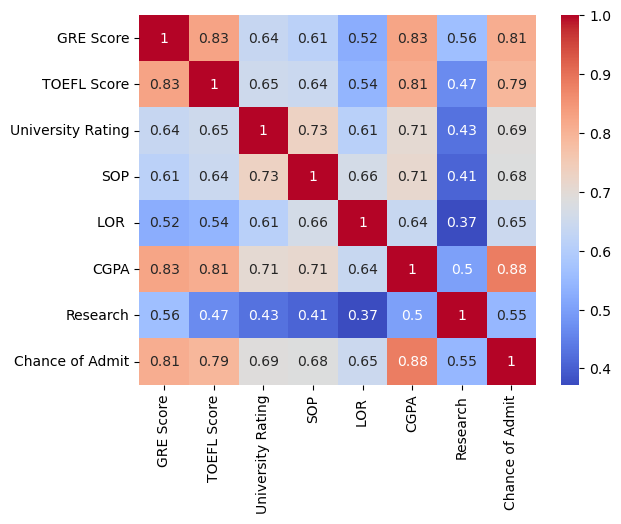

In [16]:
#now let check the correlation matrix of the variables
#HEATMAT - CORRELATION MATRIX

sns.heatmap(data_new.corr(), annot=True, cmap='coolwarm')

### The code generates histograms to visualize the distribution of various features in the DataFrame 'df'. Each histogram is created using the seaborn library's 'histplot' function. The features being plotted include 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP Ratings', and 'CGPA'. 

#### NOTE: The 'kde=False' argument indicates that the kernel density estimation plot should not be included

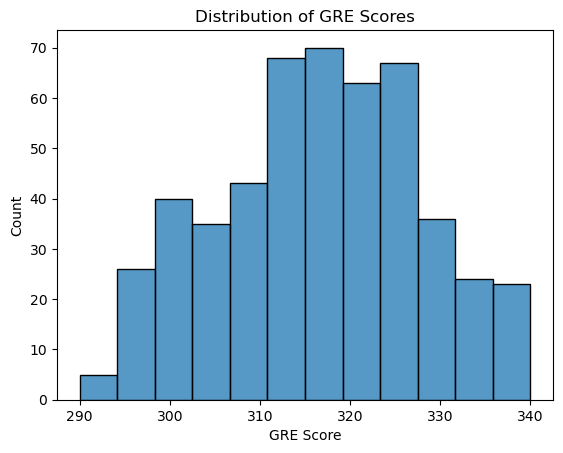

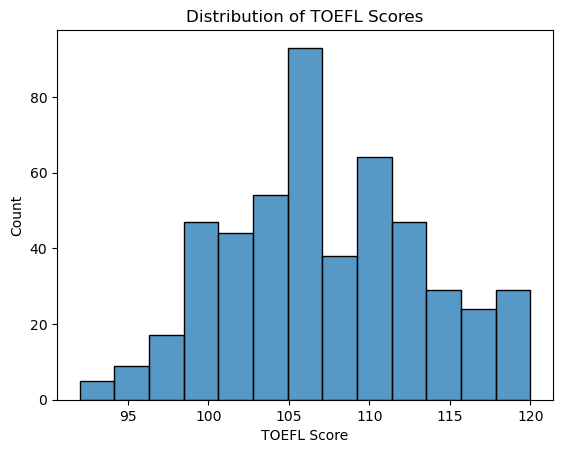

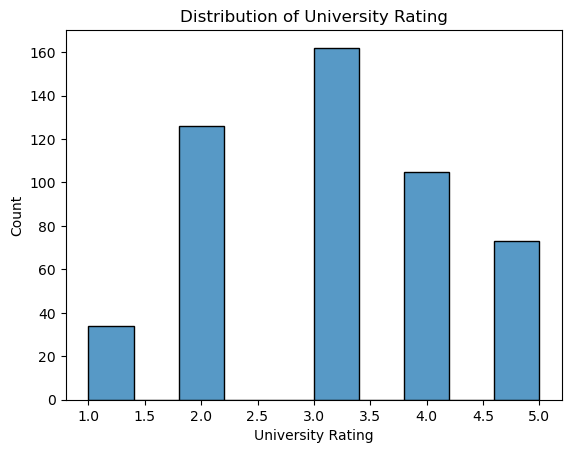

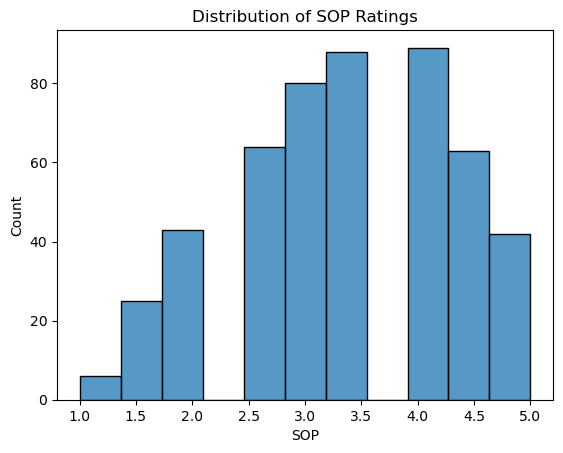

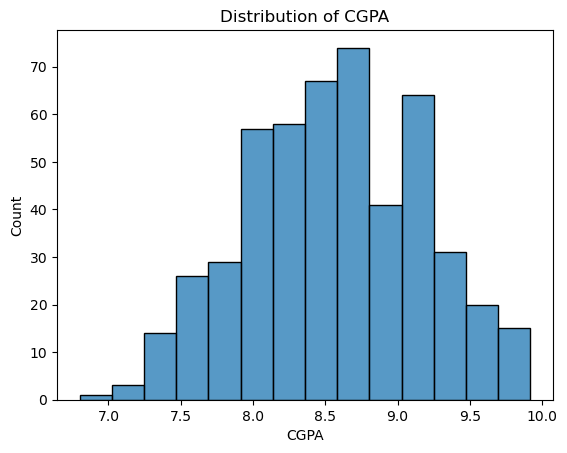

In [17]:
sns.histplot(data_new['GRE Score'], kde=False)
plt.title("Distribution of GRE Scores")
plt.show()

sns.histplot(data_new['TOEFL Score'], kde=False)
plt.title("Distribution of TOEFL Scores")
plt.show()

sns.histplot(data_new['University Rating'], kde=False)
plt.title("Distribution of University Rating")
plt.show()

sns.histplot(data_new['SOP'], kde=False)
plt.title("Distribution of SOP Ratings")
plt.show()

sns.histplot(data_new['CGPA'], kde=False)
plt.title("Distribution of CGPA")
plt.show()

### Let us work on outliers

#### the code below will be used to display numerical variable from the dataFrame. Also boxplot will be used for the numerical variable to visualze and analyze also to spot outliers

In [18]:
#let us import math
import math

# we will start by Selecting the numerical features from the datasets
numerical_features = data_new.select_dtypes(include=['float64','int64']).columns

rounded_up_value = math.ceil(len(numerical_features)/3)

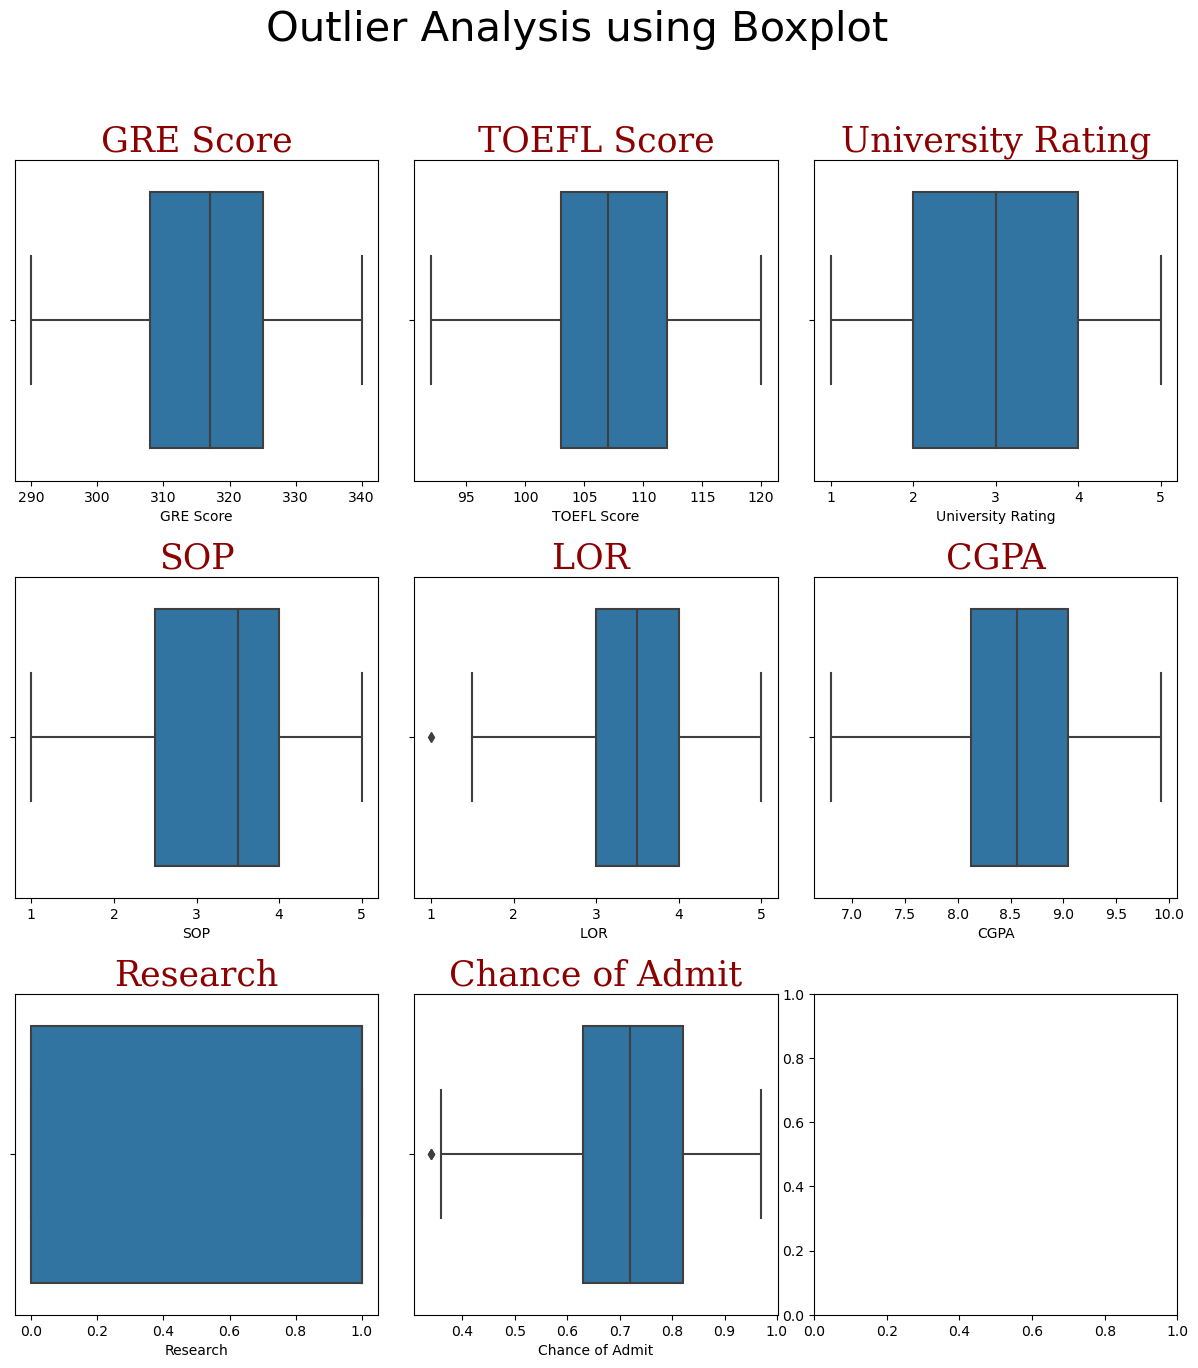

In [19]:
# plot the boxplots for all numerical variables

fig, axes = plt.subplots(rounded_up_value, 3, figsize=(15, 15))
fig.subplots_adjust(wspace=0.1, hspace=0.3)    #wspace means width space and hspace means height soace
fig.suptitle('Outlier Analysis using Boxplot', fontsize=30)
axes = axes.ravel()
font = {
    'family': 'serif',
    'color':  'darkred',
    'weight': 'normal',
    'size': 16,
}

#using for loop,
for i, col in enumerate(numerical_features):
    sns.boxplot(data_new[col], ax=axes[i])
    axes[i].set_title(col, fontdict=font, fontsize=25)

let make use of a code called "detect_outliers" that takes a dataframe and a column as input.

What does it do? It calculates the lower and upper limits for outlier detection using the interquartile range (IQR) method and identifies outliers in the specified column. If no outliers are present, it returns an empty list; otherwise, it returns the indices and values of the outliers.

In [20]:
def detect_outliers(data_new, col):
    Q1 = data_new[col].quantile(0.25)
    Q3 = data_new[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - (1.5 * IQR)
    upper_limit = Q3 + (1.5 * IQR)
    outliers = data_new[(data_new[col] < lower_limit) | (data_new[col] > upper_limit)]

    if len(outliers) == 0:
        return [], 'No Outliers Present'
    else:
        return outliers.index.tolist(), outliers

In [21]:
# Collect all outlier indices
all_outlier_indices = []

# Outliers values are --
for col in numerical_features:
    print('-' * 27, col,'-' * 26)
    outlier_indices, outliers = detect_outliers(data_new, col)
    all_outlier_indices.extend(outlier_indices)
    print(outliers)
    print('\n')

--------------------------- GRE Score --------------------------
No Outliers Present


--------------------------- TOEFL Score --------------------------
No Outliers Present


--------------------------- University Rating --------------------------
No Outliers Present


--------------------------- SOP --------------------------
No Outliers Present


--------------------------- LOR  --------------------------
     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
347        299           94                  1  1.0   1.0  7.34         0   

     Chance of Admit  
347             0.42  


--------------------------- CGPA --------------------------
No Outliers Present


--------------------------- Research --------------------------
No Outliers Present


--------------------------- Chance of Admit --------------------------
     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
92         298           98                  2  4.0   3.0  8.03      

In [22]:
#let us work on the unique outliers indices also removing any duplicates from the previously collected outlier indices.

unique_outlier_indices = list(set(all_outlier_indices))

# Print the unique indices and their count
print("Unique outlier indices:", unique_outlier_indices)
print("Number of unique outlier indices:", len(unique_outlier_indices))

Unique outlier indices: [376, 347, 92]
Number of unique outlier indices: 3


In [23]:
# let us drop the rows with unique outlier indices from the original dataframe

data_new = data_new.drop(unique_outlier_indices)

### DATA VISUALIZATION

In [24]:
data_new.head(499)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [25]:
#we shall be visualizing the input variables with the target variable(chance of admit)

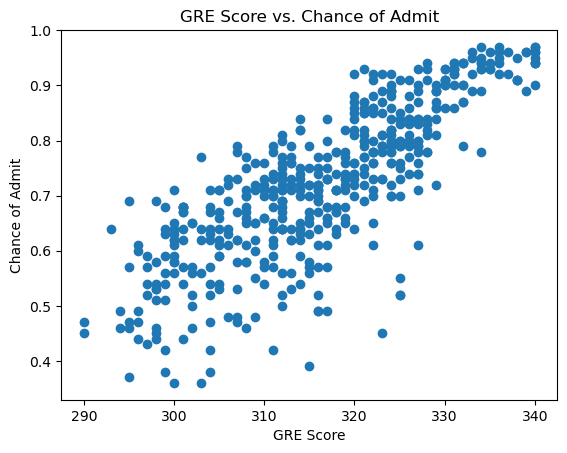

In [26]:
# Scatter Plot: GRE Score vs. Chance of Admit
plt.scatter(data_new['GRE Score'], data_new['Chance of Admit'])
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')
plt.title('GRE Score vs. Chance of Admit')
plt.show()

In [27]:
#there is linear relationship between GRE SCORE and Chance of Admit, the higher the GRE Score the higher the chance of admission
# of a student

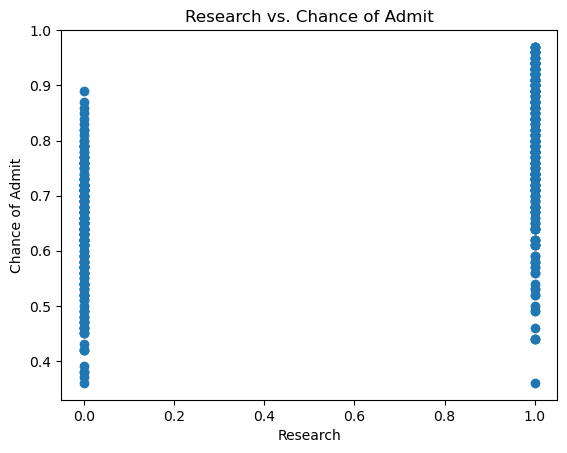

In [28]:
# Scatter Plot: Research vs. Chance of Admit
plt.scatter(data_new['Research'], data_new['Chance of Admit'])
plt.xlabel('Research')
plt.ylabel('Chance of Admit')
plt.title('Research vs. Chance of Admit')
plt.show()

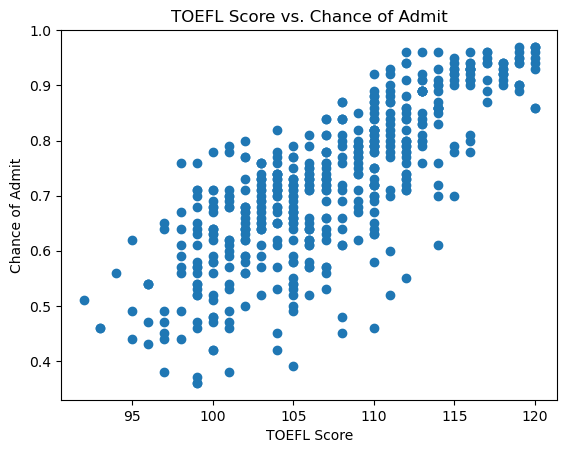

In [29]:
# Scatter Plot: TOEFL Score vs. Chance of Admit
plt.scatter(data_new['TOEFL Score'], data_new['Chance of Admit'])
plt.xlabel('TOEFL Score')
plt.ylabel('Chance of Admit')
plt.title('TOEFL Score vs. Chance of Admit')
plt.show()

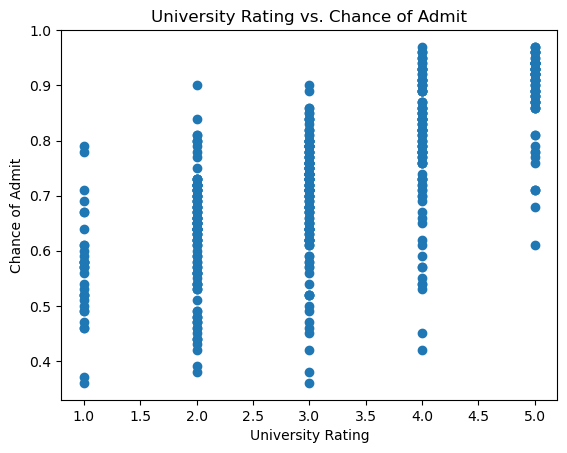

In [30]:
# Scatter Plot: University Rating vs. Chance of Admit
plt.scatter(data_new['University Rating'], data_new['Chance of Admit'])
plt.xlabel('University Rating')
plt.ylabel('Chance of Admit')
plt.title('University Rating vs. Chance of Admit')
plt.show()

### MODELLING

Scikit-learn is one of the most popular libraries for machine learning in Python and that is what we will use in the modelling part of this project.

We need to first split our training data into independent variables or predictor variables, represented by X as well as dependent variable or response variable, represented by Y.

Y_train is the chance of Admit column in our training set and X_train is the other columns in the training set excluding the Chance of Admit column. Our models will learn to classify Chance of admit, Y_train based on all X_train and make predictions on X_test.

In [31]:
#by training the data we should import the train test split 
from sklearn.model_selection import train_test_split

#now let split the data
X = data_new.drop('Chance of Admit', axis=1)
y = data_new["Chance of Admit"]

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.2, random_state=42)

### TRAINING THE MODEL 



In [32]:
# Machine learning models
from sklearn.linear_model import LinearRegression

### Logistic regression

In [33]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
acc_log = round(reg.score(X_train, y_train)*100,2)
acc_log

89.79

Our prediction is 89.79% accurate

In [36]:
#let us check the predicted data and rounding it to 2decimal place
y_pred = np.round(y_pred, decimals=2)
y_pred

array([0.65, 0.81, 0.64, 0.89, 0.65, 0.74, 0.65, 0.58, 0.59, 0.71, 0.78,
       0.68, 0.59, 0.96, 0.64, 0.54, 0.52, 0.6 , 0.82, 0.66, 0.68, 0.54,
       0.65, 0.91, 0.7 , 0.52, 0.83, 0.59, 0.57, 0.83, 0.87, 0.78, 0.88,
       0.66, 0.74, 0.42, 0.84, 0.73, 0.65, 0.77, 0.6 , 0.53, 0.96, 0.54,
       0.96, 0.85, 0.75, 0.82, 0.95, 0.79, 0.64, 0.82, 0.49, 0.46, 0.73,
       0.92, 0.5 , 0.86, 0.6 , 0.66, 0.74, 0.55, 0.87, 0.66, 0.68, 0.76,
       0.58, 0.97, 0.87, 0.79, 0.56, 0.78, 0.65, 0.87, 0.59, 0.46, 0.71,
       0.51, 0.87, 0.45, 0.73, 0.67, 0.7 , 0.73, 0.75, 0.69, 0.6 , 0.77,
       0.75, 0.68, 0.56, 0.67, 0.77, 0.69, 0.64, 0.8 , 0.57, 0.64, 0.65,
       0.66, 0.53, 0.72, 0.82, 0.82, 0.71, 0.77, 0.93, 0.5 , 0.98, 0.71,
       0.63, 0.6 , 0.7 , 0.69, 0.5 , 0.92, 0.65, 0.83, 0.66, 0.58, 0.62,
       0.57, 0.64, 0.94, 0.56, 0.91, 0.72, 0.7 , 0.86, 0.8 , 0.61, 0.48,
       0.67, 0.98, 0.66, 0.87, 0.78, 0.67, 0.8 , 0.56, 0.66, 0.92, 0.98,
       0.88, 0.74, 0.72, 0.89, 0.49, 0.85, 0.71, 0.

In [37]:
#now let us compare between the actual chance of admit and predicted result
#we will be using the code below to create a dataframe on chance of admit and predicted result

pd.DataFrame({'Chance of Admit': y_test, 'Predicted Result':y_pred})

,Chance of Admit,Predicted Result
486,0.68,0.65
73,0.84,0.81
232,0.69,0.64
176,0.90,0.89
238,0.70,0.65
...,...,...
434,0.64,0.61
430,0.74,0.66
338,0.81,0.80
237,0.86,0.90


In [38]:
# we should look for the coefficient of the regression to understand our linear regression model
reg.coef_

array([ 0.00210975,  0.00193639,  0.0121426 , -0.0012212 ,  0.0144834 ,
        0.12651629,  0.0400656 ])

In [39]:
#the intercept
reg.intercept_

-1.346390920653517

Therefore, the equation of our multiple linear regression model is:

Chance of Admit = 0.00210975×GRE Score + 0.00193639×TOEFL Score + 0.0121426×University Rating - 0.0012212×SOP + 0.0144834×LOR + 0.12651629xCGPA + 0.0400656xResearch - 1.346390920653517
